In [5]:
drevesa = [dr for dr in graphs.trees(17)] #na tak nacin dobis seznam objektov dreves s 17 vozlisci (ni duplikatov)
stevilo_dreves = len(drevesa) #stevilo dreves s 17 vozlisci
stevilo_dreves5
#G = drevesa[1] #vzamem taprvo drevo iz seznama in pogledam seznam sosedov za vsako vozlisce
#for voz in G:
#    print voz, G[voz]

#show(G) #narisem drevo

48629

In [2]:
def ABCindeks(drevo): #izracun ABC indeksa za neko drevo, len(drevo[u]) ti da dolzino seznama sosedov za vozlisce u torej je to stopnja vozlisca u
    produkt = 1
    for u in drevo:
        for v in drevo[u]:
            produkt = produkt * (len(drevo[u]) + len(drevo[v]) - 2) / (len(drevo[u]) * len(drevo[v]))
    return sqrt(produkt)

#ABCindeks(G)

In [3]:
def minABCindeks(n): #izracun najmanjsega ABC indeksa za vsa drevesa z n vozlisci, vrne tudi seznam dreves, ki imajo ta najmanjsi indeks
    drevesa = [dr for dr in graphs.trees(n)]
    indeksi = []
    for dr in drevesa:
        indeksi.append(ABCindeks(dr))
    minimum = min(indeksi)
    pozicije = [i for i, v in enumerate(indeksi) if v == minimum] # to je da dobimo pozicije na katerih so min indeksi, da vemo katera drevesa imajo te indekse
    drevesa_z_min_ind = [drevesa[i] for i in pozicije]
    return minimum , drevesa_z_min_ind

[vrednost, graf] = minABCindeks(5)

In [4]:
rezultati = []
for n in range(17) : #range naredi seznam od 0 do 16, midva hoceva grafe z vozlisci od 1 do 17 zato je spodaj n+1
        rez = [vrednost, seznam_grafov] = minABCindeks(n+1)
        rezultati.append(rez)
rezultati #rabu je slabo minuto da je to vn vrgu tkoda mormo za vecje grafe probat - problem nastane pri spominu ne počasnosti

[(1, [Graph on 1 vertex]),
 (0, [Graph on 2 vertices]),
 (1/4, [Graph on 3 vertices]),
 (1/8, [Graph on 4 vertices]),
 (1/16, [Graph on 5 vertices]),
 (1/32, [Graph on 6 vertices]),
 (1/64, [Graph on 7 vertices, Graph on 7 vertices]),
 (1/128, [Graph on 8 vertices, Graph on 8 vertices]),
 (1/256,
  [Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices]),
 (1/576, [Graph on 10 vertices]),
 (1/1152, [Graph on 11 vertices]),
 (5/12288, [Graph on 12 vertices]),
 (1/5184, [Graph on 13 vertices]),
 (3/32768, [Graph on 14 vertices]),
 (25/589824, [Graph on 15 vertices]),
 (25/1179648, [Graph on 16 vertices, Graph on 16 vertices]),
 (5/524288, [Graph on 17 vertices])]

In [9]:
# recimo da naju zanimajo premeri teh grafov, uporabiva lahko metodo diameter za objekte graphs
premeri = []
for (vrednost, seznam_grafov) in rezultati:
    pr = []
    for graf in seznam_grafov:
        pr.append(graf.diameter())
    premeri.append(pr)
premeri

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6, 4],
 [7, 5],
 [8, 6, 6, 4],
 [5],
 [6],
 [5],
 [6],
 [5],
 [6],
 [7, 6],
 [6]]

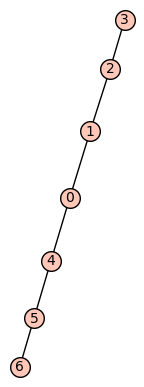

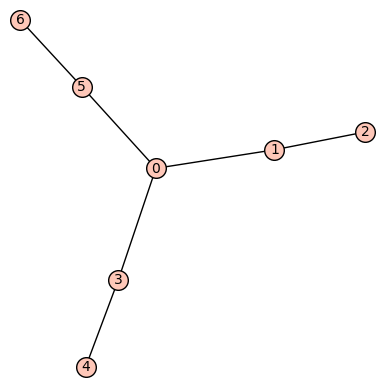

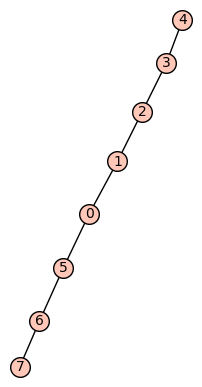

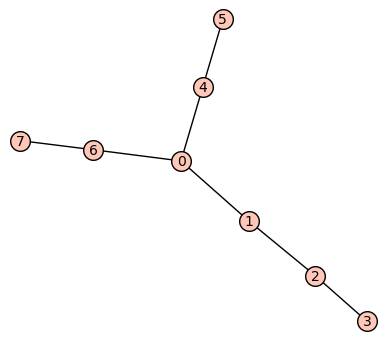

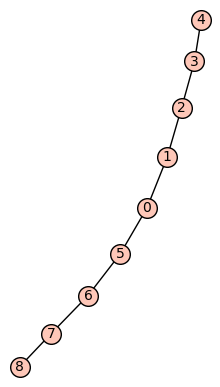

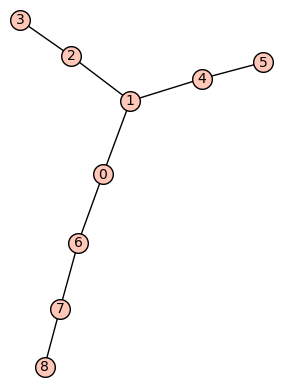

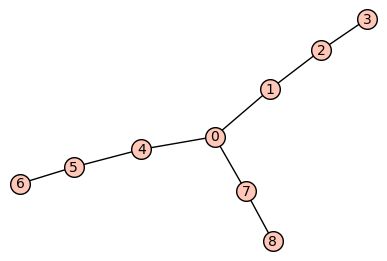

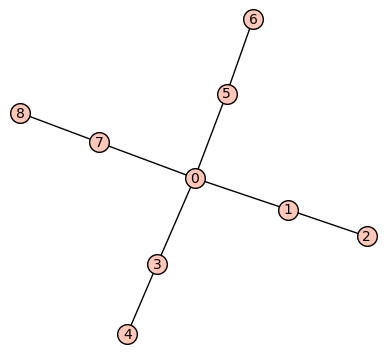

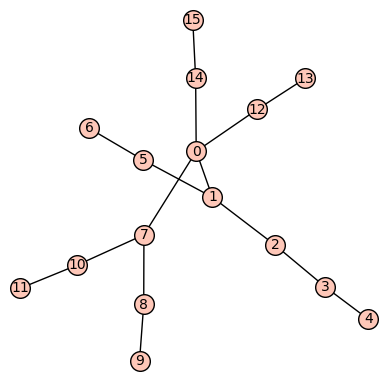

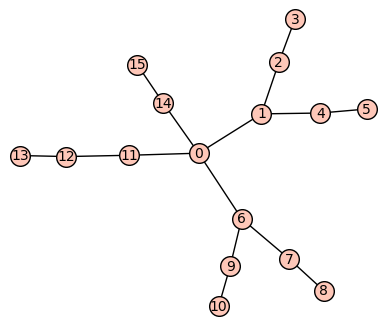

In [10]:
#ce naju zanima unikatnost dreves, lahko v seznamu dreves v rezultatih vidiva ali je samo eno drevo z min indeksom ali jih je vec, ce jih je vec si jih je morda smiselno narisati
for (vrednost, seznam_grafov) in rezultati:
    if len(seznam_grafov) >= 2:
        for graf in seznam_grafov:
            show(graf)

In [5]:
#ce naju zanimajo dolzine najdaljsih poti v grafih 
def najdaljsa_pot(graf):
    najdaljsa = 0
    for u in graf:            #gremo cez vsa vozlisca v grafu
        if len(graf[u]) == 2:  #ce imajo stopnjo = 2 nadaljujemo
            soseda = graf[u]
            s = u #dolocimo sedanje vozlisce
            dolzina = 3        #sedaj imamo pot dolzine vsaj 3 - sedanje vozlišče in njegova soseda
            if len(graf[soseda[0]]) != 2: #preverimo ali ima vsaj eno od sosednjih vozlisc stopnjo neenako 2 (da ne zacnemo steti sredi poti)
                p = soseda[0] #dolocimo prejsnje vozlisce (tisto s stopnjo neenako 2)
                n = soseda[1] # in naslednje vozlisce
            elif len(graf[soseda[1]]) != 2:
                p = soseda[1]
                n = soseda[0]
            else: #ce imata obe sosednji vozlisci stopnjo 2 smo na sredi poti in tega primera ne preverjamo
                continue
            while len(graf[n]) == 2: #z while zanko se bomo sedaj premikali po poti dokler ne naletimo na vozlisce ki nima stopnje = 2
                dolzina += 1 #za vsako naslednje vozlisce povecamo dolzino
                p = s #premanemo vozlisca: novo prejsnje je staro sedanje,
                s = n #novo sedanje je staro naslednje
                if graf[s][0] != p: #novo naslednje je tisto od sosedov novega sedanjega ki ni enako novemu prejsnjemu
                    n = graf[s][0]
                else:
                    n = graf[s][1]
        else:
            continue
        if dolzina > najdaljsa: #ce smo nasli novo najdaljso pot jo shranimo
            najdaljsa = dolzina
    return najdaljsa

najdaljse_poti = []
for (vrednost, seznam_grafov) in rezultati:
    dol = []
    for graf in seznam_grafov:
        dol.append(najdaljsa_pot(graf))
    najdaljse_poti.append(dol)

najdaljse_poti

[[0],
 [0],
 [3],
 [4],
 [5],
 [6],
 [7, 3],
 [8, 4],
 [9, 5, 4, 3],
 [3],
 [4],
 [3],
 [3],
 [3],
 [3],
 [4, 4],
 [3]]